## 16장 실전 데이터 분석 프로젝트
## 16.1 데이터 분석 프로세스
|순서|설명|
|:--|:--|
|주제 선정|분석의 목표와 목적 확립|
|데이터 수집|주제에 맞는 데이터 수집, 수집 방법 및 저장 관리, 원하는 데이터가 없을 시 직접 수집. 국내외의 다양한 사이트 적극적으로 활용|
|데이터 처리|데이터 분석이 가능하도록 데이터를 처리, 수정 및 제거(누락, 잘못된 값, 필요없는 값 등)|
||데이터 정제 = 초기 데이터 수정 및 제거, 데이터 타이딩 = 데이터를 알아보기 쉽게 처리된 깔끔한 데이터|
|데이터 분석|통계적 분석방법, 머신러닝 분석 방법 등을 이용해 각종 분석 및 예측|
|정보 도출|도출된 결과에서 유의미한 결론 및 앞의 과정 검증|

기업의 입장에서 수익을 창출할 수 있는가가 중요   
공공기관의 입장에서는 비용을 효율적으로 활용해 시민들에게 긍정적 영향

## 16.2 데이터 획득, 처리, 시각화 심화
### 깃허브에서 파일 다운로드

In [ ]:
import requests

# 깃허브의 파일 URL
url = 'https://github.com/wikibook/python-for-data-analysis-rev/raw/master/readme.txt'

# URL에 해당하는 파일을 내려받음
r = requests.get(url)

# 파일을 저장할 폴더와 파일명을 지정
file_name = 'C:/myPyCode/data/readme.txt'

# 내려받은 파일을 지정한 폴더에 저장
with open(file_name, 'wb') as f:
    f.write(r.content)

지정한 위치에 파일이 있는지 확인

In [ ]:
import os

os.path.isfile(file_name) 

In [ ]:
!type C:\myPyCode\data\missing_data_test.csv

pandas의 DataFrame 형식으로 읽어오기

In [ ]:
import pandas as pd

data_file = "C:/myPyCode/data/missing_data_test.csv"

df = pd.read_csv(data_file, encoding = "cp949", index_col = "연도")

df

In [ ]:
df.isnull()

isnull()의 합계 계산하기

In [ ]:
df.isnull().sum()

#### 결측치 처리
결측치가 있는 행이나 열 제거

In [ ]:
df.drop(index=[2019])

In [ ]:
df.drop(columns=['제품3','제품4'])

In [ ]:
df.drop(index=[2018,2019], columns=['제품3','제품4'])

dropna()로 실행: 결측치 행 제거

In [ ]:
df.dropna() # axis = 0 이 디폴트.

제품1에 결측치가 있는 경우만 제거

In [ ]:
df.dropna(axis=0, subset=['제품1'])

결측치가 있는 열 제거

In [ ]:
df.dropna(axis=1)

2015인 행에서 결측치가 있는 열 제거

In [ ]:
df.dropna(axis=1, subset=[2015])

여러 값 입력

In [ ]:
df.dropna(axis=1, subset=[2016, 2019])

결측치 전체를 0으로 채우기

In [ ]:
df.fillna(0)

열의 다음 값을 당겨오기

In [ ]:
df.fillna(method='bfill') # behind fill

열의 이전 값을 내려넣기

In [ ]:
df.fillna(method='ffill') # front fill

지정된 값 넣기

In [ ]:
values = {'제품1':100, '제품4':400}
df.fillna(value=values)

### 데이터의 요약 및 재구성
#### 데이터의 구조 살펴보기

In [ ]:
import pandas as pd

data_file = "C:/myPyCode/data/total_sales_data.csv"

df_sales = pd.read_csv(data_file)
df_sales

In [ ]:
df_sales.info()

중복되지 않는 값 알아보기

In [ ]:
df_sales['매장명'].value_counts()

In [ ]:
df_sales['제품종류'].value_counts()

#### 피벗 테이블로 데이터 재구성하기
DataFrame_data.pivot_table(values=None, index=None, columns=Nonen, aggfunc=)

In [ ]:
df_sales.pivot_table(index=['매장명','제품종류','모델명'],
                     values=['판매','재고'], aggfunc='sum')

종류에 따른 재고량 확인

In [ ]:
df_sales.pivot_table(index=["매장명"], columns = ["제품종류"],
                     values =["판매","재고"], aggfunc='sum')

매장별로 종류에 따른 재고와 판매 모델 수

In [ ]:
df_sales.pivot_table(index=["매장명"], columns = ["제품종류"],
                     values =["판매","재고"], aggfunc='count')

In [ ]:
df_sales2 = df_sales[df_sales['매장명']=='A']['재고'][0] = 0

### 워드 클라우드를 이용한 데이터 시각화

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file_name = 'C:/myPyCode/data/littleprince_djvu.txt'

with open(file_name) as f: # 파일을 읽기 모드로 열기
    text = f.read() # 파일의 내용 읽어오기

# 워드 클라우드의 이미지를 생성합니다.
wordcloud_image = WordCloud().generate(text)

# 생성한 워드 클라우드 이미지를 화면에 표시합니다.
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis("off")
plt.show()

이미지 옵션

In [ ]:
wordcloud_image = WordCloud(background_color='white', max_font_size=300, width=800, height=400).generate(text)

plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()

이미지 저장

In [ ]:
image_file_name = 'C:/myPyCode/figures/little_prince.png'

wordcloud_image.to_file(image_file_name)
plt.show()

한글 단어의 빈도수 출력

In [ ]:
import pandas as pd

word_count_file = 'C:/myPyCode/data/word_count.csv'
word_count = pd.read_csv(word_count_file, index_col = '단어')
word_count.head(5)

generate_from_frequencies 사용을 위해 딕셔너리나 Series로 변경

In [ ]:
word_count['빈도'][0:5]

type 확인

In [ ]:
type(word_count['빈도'])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

korean_font_path = 'C:/Windows/Fonts/malgun.ttf' # 한글 폰트(맑은 고딕) 파일명

# 워드 클라우드 이미지 생성
wc = WordCloud(font_path=korean_font_path, background_color='white')

frequencies = word_count['빈도'] # pandas의 Series 형식이 됨
wordcloud_image = wc.generate_from_frequencies(frequencies)

# 생성한 워드 클라우드 이미지를 화면에 표시
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd

data_file = "C:/myPyCode/data/total_sales_data2.csv"

df_sales2 = pd.read_csv(data_file)
df_sales2

In [ ]:
df_sales2.pivot_table(index=["매장명"], columns = ["제품종류"],
                     values =["판매","재고"], aggfunc='count')

In [ ]:
df_sales.pivot_table(index=["매장명"], columns = ["제품종류"],
                     values =["판매","재고"], aggfunc='count')

## 16.3 실전 데이터(서울시 업무추진비) 분석
### 데이터 분석의 주제 선정
### 데이터 수집
깃허브로부터 서울시의 업무추진비 다운로드

In [25]:
import requests
import os
import pathlib

In [26]:
# 인자: 확장자, 연도, 내려받을 폴더
def get_seoul_expense_list(extenstion, year, data_folder):
    
    # 깃허브의 데이터 위치 지정
    # ex) 'https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/'
    expense_list_year_url = f'https://github.com/seoul-opengov/opengov/raw/master/expense_list{str(year)}/'
        
    # 데이터를 내려받을 폴더 지정
    # ex) 'C:/myPyCode/data/seoul_expense/2016/'
    expense_list_year_dir = data_folder + str(year) + '/'
    
    # 내려받을 폴더가 없다면 폴더 생성
    if os.path.isdir(expense_list_year_dir):
        print(f'데이터 폴더({year})가 이미 있습니다. {year}년 데이터의 다운로드를 시작합니다.')
    else:
        print(f'데이터 폴더({year})가 없어서 생성했습니다. {year}년 데이터의 다운로드를 시작합니다.')
        # 폴더 생성
        pathlib.Path(expense_list_year_dir).mkdir(parents=True, exist_ok=True)
        
    # 지정한 폴더로 1월~12월 업무추진비 파일을 다운로드
    for k in range(12):
        file_name = f'{year}{k+1:02d}_expense_list.{extension}'
        url = expense_list_year_url + file_name
        print(url)
        r = requests.get(url)
        if "Page not found" not in r.text:
            with open(expense_list_year_dir + file_name, 'wb') as f:
                f.write(r.content)
        else:
            print("해당 파일이 없습니다. 해당 연월 데이터를 건너뜁니다.")
            continue
        

In [ ]:
from bs4 import BeautifulSoup

file_name = f'201601_expense_list.{extension}'
url = expense_list_year_url = f'https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/' + file_name
print(url)
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
"Page not found" in soup.find('title').text

In [ ]:
# 내려받을 업무추진비 데이터의 파일 형식을 지정
extension = 'csv'

# 내려받을 업무추진비 데이터의 연도를 지정
year = 2022

# 내려받을 업무추진비 데이터의 폴더를 지정
data_folder = 'C:/myPyCode/data/seoul_expense/'

# 함수를 실행
get_seoul_expense_list(extension, year, data_folder)

받은 자료 확인

In [27]:
import glob

path_name = 'C:/myPyCode/data/seoul_expense/2017/' # 폴더 이름

# 지정 폴더에서 파일명에 list.csv가 포함된 파일만 지정
file_name_for_glob = path_name + "*list.csv" 

csv_files = []
for csv_file in glob.glob(file_name_for_glob): 
    # 반환값에서 폴더는 제거하고 파일 이름만 추출
    csv_files.append(csv_file.split("\\")[-1]) 

print("[폴더 이름]", path_name) # 폴더명 출력
print("* CSV 파일:", csv_files)

[폴더 이름] C:/myPyCode/data/seoul_expense/2017/
* CSV 파일: ['201701_expense_list.csv', '201702_expense_list.csv', '201703_expense_list.csv', '201704_expense_list.csv', '201705_expense_list.csv', '201706_expense_list.csv', '201707_expense_list.csv', '201708_expense_list.csv', '201709_expense_list.csv', '201710_expense_list.csv', '201711_expense_list.csv', '201712_expense_list.csv']


여러 연도 파일 다운받기

In [ ]:
data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2017, 2018, 2019, 2020, 2021] # 다운로드받을 연도를 지정

extension = "csv"
# extension = "xlsx"
# extension = "xml"

for year in years:
    get_seoul_expense_list(extension, year, data_folder)

print("모든 데이터를 다운로드 받았습니다.")

### 데이터 처리
#### 수집된 데이터 파일의 구조 분석
2017년 1월 파일의 3개 줄 열기

In [56]:
data_file = 'C:/myPyCode/data/seoul_expense/2021/202101_expense_list.csv'

with open(data_file, encoding='utf-8') as f:
    line1 = f.readline()
    line2 = f.readline()
    line3 = f.readline()

    print(line1)
    print(line2)
    print(line3)

﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount,bimok

22249566,"2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체",http://opengov.seoul.go.kr/public/22249566,사업소,물재생센터,중랑물재생센터,,,2021,1,,,,"중랑물재생센터 관리과","2021-01-25 00:00",,"소속직원 경조사비","김광옥, 김용성",현금,100000,

22249566,"2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체",http://opengov.seoul.go.kr/public/22249566,사업소,물재생센터,중랑물재생센터,,,2021,1,,,,"중랑물재생센터 운영과","2021-01-22 00:00",복시루,"운영과 다과구매-전출직원선물",,카드,90000,



In [ ]:
line2 = '11430252,"2017년 1월 장애,인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-26 13:10","동해일식 (중구 무교동)","기본소득과, 장애인복지 논의간담회","장애인복지정책,팀장 외 2명",카드,76000'
while '"' in line2:
    tmp_li = line2.split('"',2)
    print('1',tmp_li[1])
    tmp_li[1] = tmp_li[1].replace(',','')
    print('2',tmp_li[1])
    line2 = ''.join(tmp_li)
    print('3', line2)

# a = []
# for i in line2.split(',"'):
#     a.append(',' in i)
# print(a)

In [ ]:
line2 = '11430252,"2017년 1월 장애,인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-26 13:10","동해일식 (중구 무교동)","기본소득과, 장애인복지 논의간담회","장애인복지정책,팀장 외 2명",카드,76000'
tmp_li = line2.split('"',2)
tmp_li[1] = tmp_li[1].replace(',','')
line2 = ''.join(tmp_li)

In [ ]:
line1_len = len(line1.split(','))
line2_len = len(line2.split(','))
line3_len = len(line3.split(','))

print("[각 줄의 데이터값의 개수]")
print("첫째 줄:{}, 둘째 줄:{}, 셋째 줄:{}".format(line1_len, line2_len, line3_len))

따옴표 안에 있는 콤마 제거

In [70]:
def get_value_count(line):
    
    while True:
        if '"' in line:
            tmp_li = line.split('"',2)
            tmp_str = tmp_li[1].replace(',','')
            line = tmp_li[0]+tmp_str+tmp_li[2]
        else:
            break
            
    line_split = line.split(',')
    if len(line_split) == 21:
        line_split.pop()

    return line_split

In [71]:
line1_len = len(get_value_count(line1))
line2_len = len(get_value_count(line2))
line3_len = len(get_value_count(line3))

print("[각 줄의 데이터값의 개수]")
print("첫째 줄:{}, 둘째 줄:{}, 셋째 줄:{}".format(line1_len, line2_len, line3_len))

[각 줄의 데이터값의 개수]
첫째 줄:20, 둘째 줄:20, 셋째 줄:20


In [72]:
get_value_count(line2)

['22249566',
 '2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체',
 'http://opengov.seoul.go.kr/public/22249566',
 '사업소',
 '물재생센터',
 '중랑물재생센터',
 '',
 '',
 '2021',
 '1',
 '',
 '',
 '',
 '중랑물재생센터 관리과',
 '2021-01-25 00:00',
 '',
 '소속직원 경조사비',
 '김광옥 김용성',
 '현금',
 '100000']

#### 첫 번째 줄의 열 이름과 개수 변경

In [97]:
def change_csv_file_first_line_value(old_file_name, new_file_name):
    with open(old_file_name, encoding='utf-8') as f:  # 파일을 읽기 모드로 열기
        # 전체 데이터를 읽어서 한 줄씩 lines 리스트의 각 요소에 할당
        lines = f.read().splitlines()
    
    # 첫째 줄의 내용을 변경할 열 이름을 지정해서 변경
    if 'bimok' in lines[0]:
        lines[0] = 'nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,비목'
    else:
        lines[0] = 'nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액'
    
    with open(new_file_name, 'w', encoding='utf-8') as f:  # 파일을 쓰기 모드로 열기
        # 리스트 내의 각 요소를 개행문자(\n)로 연결해서 파일로 저장
        f.write('\n'.join(lines))

In [98]:
# 기존의 파일
old_file_name = 'C:/myPyCode/data/seoul_expense/2021/202101_expense_list.csv'

# 새로운 파일
new_file_name = 'C:/myPyCode/data/seoul_expense/2021/202101_expense_list_new.csv' 

# 첫째 줄의 내용을 변경한 새로운 파일 생성
change_csv_file_first_line_value(old_file_name, new_file_name)

In [99]:
print('''0 nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount''')

with open(new_file_name, encoding='utf-8') as f:  # 파일을 읽기 모드로 열기
    for k in range(3):
        print(f.readline())

0 nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,비목

22249566,"2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체",http://opengov.seoul.go.kr/public/22249566,사업소,물재생센터,중랑물재생센터,,,2021,1,,,,"중랑물재생센터 관리과","2021-01-25 00:00",,"소속직원 경조사비","김광옥, 김용성",현금,100000,

22249566,"2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체",http://opengov.seoul.go.kr/public/22249566,사업소,물재생센터,중랑물재생센터,,,2021,1,,,,"중랑물재생센터 운영과","2021-01-22 00:00",복시루,"운영과 다과구매-전출직원선물",,카드,90000,



In [100]:
# 인자: 연도, 데이터 파일이 있는 폴더
def change_year_csv_file_first_line_value(year, data_folder): 

    # 데이터 파일이 있는 폴더 지정
    # ex) 'C:/myPyCode/data/seoul_expense/2016/'
    expense_list_year_dir = data_folder + str(year) + '/'
    
    extension = 'csv' # 확장자 이름
    
    # 지정한 폴더에 있는 월별 업무추진비 파일에서 첫 번째 줄의 열 이름을 변경 
    for k in range(12):
        # 기존의 파일 이름 지정
        old_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension) 
        
        # 새로운 파일 이름 지정
        new_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list_new.{2}'.format(year, k+1, extension) 
  
        # 첫째 줄의 내용을 변경한 새로운 파일 생성
        change_csv_file_first_line_value(old_file_name, new_file_name)

In [101]:
data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2017, 2018, 2019, 2020, 2021] # 연도를 지정

for year in years:
    print("{}년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.".format(year))
    change_year_csv_file_first_line_value(year, data_folder)

print("모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.")

2017년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2018년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2019년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2020년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2021년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.


In [102]:
import glob

data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2017, 2018, 2019, 2020, 2021] # 연도를 지정

for year in years:
    path_name = data_folder + str(year) # 폴더명을 지정
    print("[폴더 이름]", path_name) # 폴더명 출력

    new_csv_files = []
    
    # 지정 폴더에서 파일명에 _new.csv가 포함된 파일만 지정
    file_name_for_glob = path_name + "/*_new.csv" 
    
    for new_csv_file in glob.glob(file_name_for_glob): 
        # 반환값에서 폴더는 제거하고 파일 이름만 추출
        new_csv_files.append(new_csv_file.split("\\")[-1]) 
    
    print("* 새롭게 생성된 CSV 파일:", new_csv_files)

[폴더 이름] C:/myPyCode/data/seoul_expense/2017
* 새롭게 생성된 CSV 파일: ['201701_expense_list_new.csv', '201702_expense_list_new.csv', '201703_expense_list_new.csv', '201704_expense_list_new.csv', '201705_expense_list_new.csv', '201706_expense_list_new.csv', '201707_expense_list_new.csv', '201708_expense_list_new.csv', '201709_expense_list_new.csv', '201710_expense_list_new.csv', '201711_expense_list_new.csv', '201712_expense_list_new.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2018
* 새롭게 생성된 CSV 파일: ['201801_expense_list_new.csv', '201802_expense_list_new.csv', '201803_expense_list_new.csv', '201804_expense_list_new.csv', '201805_expense_list_new.csv', '201806_expense_list_new.csv', '201807_expense_list_new.csv', '201808_expense_list_new.csv', '201809_expense_list_new.csv', '201810_expense_list_new.csv', '201811_expense_list_new.csv', '201812_expense_list_new.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2019
* 새롭게 생성된 CSV 파일: ['201901_expense_list_new.csv', '201902_expense_list_new.csv', '2019

#### 데이터의 구조 및 결측치 살펴보기

In [103]:
import pandas as pd

expense_list2016_dir = 'C:/myPyCode/data/seoul_expense/2021/'
file_name = "202101_expense_list_new.csv"

df = pd.read_csv(expense_list2016_dir + file_name)

In [104]:
df.head(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,...,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,비목
0,22249566,2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체,http://opengov.seoul.go.kr/public/22249566,사업소,물재생센터,중랑물재생센터,NaN,NaN,2021,1,...,NaN,NaN,중랑물재생센터 관리과,2021-01-25 00:00,NaN,소속직원 경조사비,"김광옥, 김용성",현금,100000,NaN
1,22249566,2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체,http://opengov.seoul.go.kr/public/22249566,사업소,물재생센터,중랑물재생센터,NaN,NaN,2021,1,...,NaN,NaN,중랑물재생센터 운영과,2021-01-22 00:00,복시루,운영과 다과구매-전출직원선물,NaN,카드,90000,NaN


In [105]:
df.tail(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,...,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,비목
4876,22241159,2021년 1월 사업소 상수도사업본부 중부수도사업소 요금과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/22241159,사업소,상수도사업본부,중부수도사업소,요금과,NaN,2021,1,...,NaN,NaN,중부수도 요금과,2021-01-27 15:19,가메골에프엔비㈜(중구 남대문시장4길 42),부서 직원 교육 및 신년간담회,요금과 직원 20명,카드,64000,NaN
4877,22241159,2021년 1월 사업소 상수도사업본부 중부수도사업소 요금과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/22241159,사업소,상수도사업본부,중부수도사업소,요금과,NaN,2021,1,...,NaN,NaN,중부수도 요금과,2021-01-22 00:00,추어탕(중구 다산로 75 3층),간부 신년간담회,소장외 3명,카드,36000,NaN


In [139]:
import pandas as pd

year = 2020
expense_list_year_dir = 'C:/myPyCode/data/seoul_expense/' + str(year) + '/'

df_year = pd.DataFrame()
for k in range(12):
    
    # 파일 이름 지정
    file_name = "{0}{1:02d}_expense_list_new.csv".format(year, k+1)
    
    # pandas DataFrame 형식으로 csv 데이터 불러오기
    df_month = pd.read_csv(expense_list_year_dir + file_name)
    
    # df_year에 df_month를 세로 방향으로 추가해서 다시 df_year에 할당
    # 통합된 dataFrame의 순서대로 index를 할당하기 위해서 `ignore_index = True` 옵션 지정
    df_year = pd.concat([df_year, df_month], ignore_index = True)
    display(df_year.columns)

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
       '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
       '집행금액', '비목'],
      dtype='object')

In [107]:
df_year['집행연도'].value_counts()

2021    83819
Name: 집행연도, dtype: int64

In [108]:
df_year.head(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,...,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,비목
0,22249566,2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체,http://opengov.seoul.go.kr/public/22249566,사업소,물재생센터,중랑물재생센터,NaN,NaN,2021,1,...,NaN,NaN,중랑물재생센터 관리과,2021-01-25 00:00,NaN,소속직원 경조사비,"김광옥, 김용성",현금,100000,NaN
1,22249566,2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체,http://opengov.seoul.go.kr/public/22249566,사업소,물재생센터,중랑물재생센터,NaN,NaN,2021,1,...,NaN,NaN,중랑물재생센터 운영과,2021-01-22 00:00,복시루,운영과 다과구매-전출직원선물,NaN,카드,90000,NaN


In [109]:
df_year.tail(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,...,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,비목
83817,25116134,2021년 12월 사업소 상수도사업본부 뚝도아리수정수센터 업무추진비 - 기관운영 시...,http://opengov.seoul.go.kr/expense/25116134,사업소,상수도사업본부,뚝도아리수정수센터,NaN,NaN,2021,12,...,0.0,NaN,뚝도아리수 정수센터,2021-12-28 16:48,현대마트(성동구 성덕정길29),기관운영 물품 구매,소장,카드,113180,NaN
83818,25116134,2021년 12월 사업소 상수도사업본부 뚝도아리수정수센터 업무추진비 - 기관운영 시...,http://opengov.seoul.go.kr/expense/25116134,사업소,상수도사업본부,뚝도아리수정수센터,NaN,NaN,2021,12,...,0.0,NaN,뚝도아리수 정수센터,2021-12-28 10:15,서울시청매점(중구 덕수궁길),소장실 운영물품 구매,소장,카드,84000,NaN


In [110]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83819 entries, 0 to 83818
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nid     83819 non-null  int64  
 1   제목      83819 non-null  object 
 2   url     83819 non-null  object 
 3   부서레벨1   83819 non-null  object 
 4   부서레벨2   83819 non-null  object 
 5   부서레벨3   67930 non-null  object 
 6   부서레벨4   24831 non-null  object 
 7   부서레벨5   1473 non-null   object 
 8   집행연도    83819 non-null  int64  
 9   집행월     83819 non-null  int64  
 10  예산      60524 non-null  float64
 11  집행      60524 non-null  float64
 12  구분      980 non-null    object 
 13  부서명     83819 non-null  object 
 14  집행일시    83819 non-null  object 
 15  집행장소    83185 non-null  object 
 16  집행목적    83819 non-null  object 
 17  대상인원    83467 non-null  object 
 18  결제방법    83819 non-null  object 
 19  집행금액    83819 non-null  int64  
 20  비목      18427 non-null  object 
dtypes: float64(2), int64(4), object(15)

In [111]:
df_year.isna().sum()

nid          0
제목           0
url          0
부서레벨1        0
부서레벨2        0
부서레벨3    15889
부서레벨4    58988
부서레벨5    82346
집행연도         0
집행월          0
예산       23295
집행       23295
구분       82839
부서명          0
집행일시         0
집행장소       634
집행목적         0
대상인원       352
결제방법         0
집행금액         0
비목       65392
dtype: int64

In [113]:
if '비목' in df_year.columns:
    df_year_drop = df_year.drop(columns=['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', 
                                     '예산', '집행', '구분', '비목'])
else:
    df_year_drop = df_year.drop(columns=['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', 
                                     '예산', '집행', '구분'])
df_year_drop.head(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체,사업소,물재생센터,2021,1,중랑물재생센터 관리과,2021-01-25 00:00,NaN,소속직원 경조사비,"김광옥, 김용성",현금,100000
1,2021년 1월 사업소 물재생센터 중랑물재생센터 업무추진비 - 전체,사업소,물재생센터,2021,1,중랑물재생센터 운영과,2021-01-22 00:00,복시루,운영과 다과구매-전출직원선물,NaN,카드,90000


In [114]:
year = 2021
expense_list_year_dir = 'C:/myPyCode/data/seoul_expense/' + str(year) + '/'

expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
df_year_drop.to_csv(expense_list_year_dir + expense_list_tidy_file, index = False)

In [115]:
df_year_drop['집행연도'].value_counts()

2021    83819
Name: 집행연도, dtype: int64

In [116]:
import os

file_name = expense_list_year_dir + expense_list_tidy_file
print(file_name)
os.path.isfile(file_name)

C:/myPyCode/data/seoul_expense/2021/2021_expense_list_tidy.csv


True

In [129]:
def select_columns_save_file(year, data_folder):
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    df_year = pd.DataFrame()
    
    for k in range(12):
        # 파일 이름 지정
        file_name = "{0}{1:02d}_expense_list_new.csv".format(year, k+1)
        
        # DataFrame 형식으로 csv 데이터 불러오기
        df_month = pd.read_csv(expense_list_year_dir + file_name)
        
        # df_year에 df_month를 새로 추가해서 다시 df_year에 할당
        # 통합된 adtaFrame의 순서대로 index를 할당하기 위해서 `ignore_index = True` 옵션 지정
        df_year = pd.concat([df_year, df_month], ignore_index = True)
    
    if '비목' in df_year.columns:
        df_year_drop = df_year.drop(columns=['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', 
                                         '예산', '집행', '구분', '비목'])
    else:
        df_year_drop = df_year.drop(columns=['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', 
                                         '예산', '집행', '구분'])
    new_file_name = expense_list_year_dir + expense_list_tidy_file
    df_year_drop.to_csv(new_file_name, index = False)
    
    print("==> {} 파일을 생성했습니다.".format(expense_list_tidy_file))

In [130]:
data_folder = 'C:/myPyCode/data/seoul_expense/'
years = [2017, 2018, 2019, 2020, 2021]

for year in years:
    
    print("{}년 데이터를 정리해서 저장하고 있습니다.".format(year))
    select_columns_save_file(year, data_folder)
print("모든 연도의 데이터를 정리해서 파일로 저장했습니다.")

2017년 데이터를 정리해서 저장하고 있습니다.
==> 2017_expense_list_tidy.csv 파일을 생성했습니다.
2018년 데이터를 정리해서 저장하고 있습니다.
==> 2018_expense_list_tidy.csv 파일을 생성했습니다.
2019년 데이터를 정리해서 저장하고 있습니다.
==> 2019_expense_list_tidy.csv 파일을 생성했습니다.
2020년 데이터를 정리해서 저장하고 있습니다.
==> 2020_expense_list_tidy.csv 파일을 생성했습니다.
2021년 데이터를 정리해서 저장하고 있습니다.
==> 2021_expense_list_tidy.csv 파일을 생성했습니다.
모든 연도의 데이터를 정리해서 파일로 저장했습니다.


In [131]:
import os

years = [2017, 2018, 2019, 2020, 2021]

for year in years:
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)

    file_name = expense_list_year_dir + expense_list_tidy_file
    print(file_name, "==> ", end="")
    print(os.path.isfile(file_name))

C:/myPyCode/data/seoul_expense/2017/2017_expense_list_tidy.csv ==> True
C:/myPyCode/data/seoul_expense/2018/2018_expense_list_tidy.csv ==> True
C:/myPyCode/data/seoul_expense/2019/2019_expense_list_tidy.csv ==> True
C:/myPyCode/data/seoul_expense/2020/2020_expense_list_tidy.csv ==> True
C:/myPyCode/data/seoul_expense/2021/2021_expense_list_tidy.csv ==> True


In [132]:
import os
from datetime import datetime

def get_file_info(year, data_folder):
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    print(path_file_name)
    result = os.path.isfile(path_file_name)

    # 파일 수정 시간
    modified_time = datetime.fromtimestamp(os.path.getmtime(path_file_name))
    
    # 파일 생성 시간
    created_time = datetime.fromtimestamp(os.path.getctime(path_file_name)) 
    
     # 파일 크기
    file_size = os.path.getsize(path_file_name)

    if(result == True):
        print("[생성한 CSV 데이터 파일의 정보]")
        print('* 폴더 위치 :', expense_list_year_dir)
        print('* 파일 이름 :', expense_list_tidy_file)
        print('* 수정 시간 :', modified_time.strftime('%Y-%m-%d %H:%M:%S'))
        print('* 생성 시간 :', created_time.strftime('%Y-%m-%d %H:%M:%S'))
        print('* 파일 크기 : {0:,} 바이트'.format(file_size))

In [133]:
data_folder = 'C:/myPyCode/data/seoul_expense/'
years = [2017, 2018, 2019, 2020, 2021]

for year in years:
    
    get_file_info(year, data_folder)
    print("")

C:/myPyCode/data/seoul_expense/2017/2017_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2017/
* 파일 이름 : 2017_expense_list_tidy.csv
* 수정 시간 : 2023-01-11 22:24:55
* 생성 시간 : 2023-01-11 16:41:57
* 파일 크기 : 21,505,565 바이트

C:/myPyCode/data/seoul_expense/2018/2018_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2018/
* 파일 이름 : 2018_expense_list_tidy.csv
* 수정 시간 : 2023-01-11 22:24:56
* 생성 시간 : 2023-01-11 16:48:10
* 파일 크기 : 23,012,590 바이트

C:/myPyCode/data/seoul_expense/2019/2019_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2019/
* 파일 이름 : 2019_expense_list_tidy.csv
* 수정 시간 : 2023-01-11 22:24:57
* 생성 시간 : 2023-01-11 16:50:42
* 파일 크기 : 24,459,405 바이트

C:/myPyCode/data/seoul_expense/2020/2020_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2020/
* 파일 이름 : 2020_expense_list_tidy.csv
* 수정 시간 : 2023-01-11 22:24:59
* 생성 시간 : 2023-01-11 16:50:43
* 파일 크기 : 

### 데이터 분석

In [134]:
data_folder = 'C:/myPyCode/data/seoul_expense/'

df_expense_all = pd.DataFrame()

for year in years:
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    
    df_expense = pd.read_csv(path_file_name, low_memory=False)
    df_expense_all = pd.concat([df_expense_all, df_expense], ignore_index = True) 

In [135]:
df_expense_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371238 entries, 0 to 371237
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   제목      371238 non-null  object
 1   부서레벨1   371238 non-null  object
 2   부서레벨2   370954 non-null  object
 3   집행연도    371238 non-null  int64 
 4   집행월     371238 non-null  int64 
 5   부서명     371159 non-null  object
 6   집행일시    371238 non-null  object
 7   집행장소    367864 non-null  object
 8   집행목적    371216 non-null  object
 9   대상인원    369490 non-null  object
 10  결제방법    371035 non-null  object
 11  집행금액    371238 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 34.0+ MB


In [136]:
df_expense_all.head(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [137]:
df_expense_all.tail(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
371236,2021년 12월 사업소 상수도사업본부 뚝도아리수정수센터 업무추진비 - 기관운영 시...,사업소,상수도사업본부,2021,12,뚝도아리수 정수센터,2021-12-28 16:48,현대마트(성동구 성덕정길29),기관운영 물품 구매,소장,카드,113180
371237,2021년 12월 사업소 상수도사업본부 뚝도아리수정수센터 업무추진비 - 기관운영 시...,사업소,상수도사업본부,2021,12,뚝도아리수 정수센터,2021-12-28 10:15,서울시청매점(중구 덕수궁길),소장실 운영물품 구매,소장,카드,84000


#### 연도별 추이 분석

In [138]:
year_expense = df_expense_all['집행연도'].value_counts()
year_expense

2021    83819
2019    74207
2018    72218
2020    70862
2017    70132
Name: 집행연도, dtype: int64

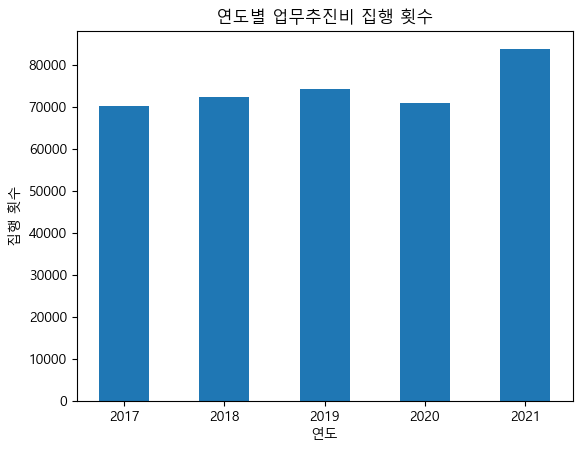

In [140]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.bar(year_expense.index, year_expense.values, tick_label =year_expense.index, width = 0.5)
plt.title("연도별 업무추진비 집행 횟수")
plt.xlabel("연도")
plt.ylabel("집행 횟수")
plt.show()

In [141]:
import pandas as pd

year_total = pd.pivot_table(df_expense_all, index = ['집행연도'], values=['집행금액'], aggfunc = sum)
year_total

,집행금액
집행연도,
2017,9076941387
2018,9937556542
2019,10532330632
2020,9808440264
2021,9255689656


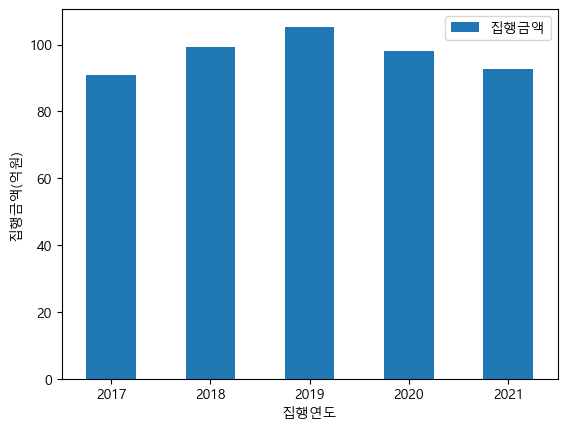

In [142]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

eok_won = 100000000 # 억원
(year_total/eok_won).plot.bar(rot=0) # 'rot = 각도'로 xtick 회전 각도를 지정
plt.ylabel('집행금액(억원)')
plt.show()

In [143]:
month_total = pd.pivot_table(df_expense_all, index = ['집행월'], values=['집행금액'], 
                             aggfunc = sum)
month_total

,집행금액
집행월,
1,3556298959
2,3622085358
3,3675095651
4,3512606868
5,3473725598
6,3874482947
7,3806323532
8,3334725050
9,3994108619


In [144]:
year_month_total = pd.pivot_table(df_expense_all, index = ['집행월'], columns=['집행연도'], 
                                  values=['집행금액'], aggfunc = sum)
year_month_total

집행금액                                                
집행연도        2017        2018        2019        2020        2021
집행월                                                             
1      710368860   735587570   882512749   776731595   451098185
2      712679864   769360005   768931868   759694988   611418633
3      737250454   761059010   816280447   662143473   698362267
4      635265805   703781418   814657376   752513810   606388459
5      647582378   669044701   747256509   770802340   639039670
6      758257342   690652154   775945999   913814872   735812580
7      701604626   788926477   881725566   821051025   613015838
8      661174850   730290532   762251087   589831097   591177484
9      806170700   769404957   841641708   776747261   800143993
10     637219943   827022975   861865780   760075068   860936842
11     843619171   960310221   915992092   878275658  1203966624
12    1225747394  1532116522  1463269451  1346759077  1444329081

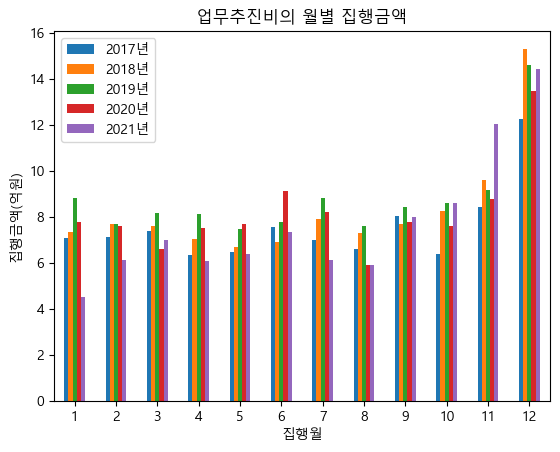

In [146]:
eok_won = 100000000 # 억원

(year_month_total/eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title("업무추진비의 월별 집행금액")
plt.legend(['2017년','2018년','2019년','2020년','2021년'])
plt.show()

#### 부서별 집행 내역 분석

In [147]:
dept_level1_total = pd.pivot_table(df_expense_all, index = ['부서레벨1'], values=['집행금액'], 
                                   aggfunc = sum)
dept_level1_total

,집행금액
부서레벨1,
사업소,11226424470
"사업소,",6449170
서울시본청,26603949874
소방재난본부(소방서),8579435633
의회사무처,2194699334


In [148]:
dept_level_2_total = pd.pivot_table(df_expense_all, index = ['부서레벨2'], values=['집행금액'], 
                                    aggfunc = sum)
dept_level_2_total.head()

,집행금액
부서레벨2,
119특수구조단,191519130
1인가구특별대책추진단,21061980
감사위원회,568342850
강남소방서,366616880
강동소방서,321884930


In [149]:
dept_level_2_total_top10 = dept_level_2_total.sort_values(by=['집행금액'], ascending = False)[0:10]
dept_level_2_total_top10

,집행금액
부서레벨2,
상수도사업본부,3542827274
기획조정실,2400824746
행정국,2020191753
서울특별시장,1283198810
시민소통기획관,1271616334
도시기반시설본부,1009085574
행정1부시장,964381873
정무부시장,880226182
기후환경본부,841719675


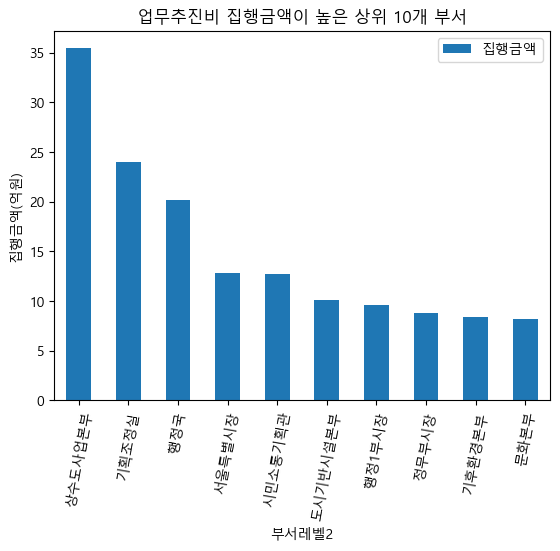

In [150]:
eok_won = 100000000 # 억원

(dept_level_2_total_top10/eok_won).plot.bar(rot=80)
plt.ylabel('집행금액(억원)')
plt.title("업무추진비 집행금액이 높은 상위 10개 부서")
plt.show()

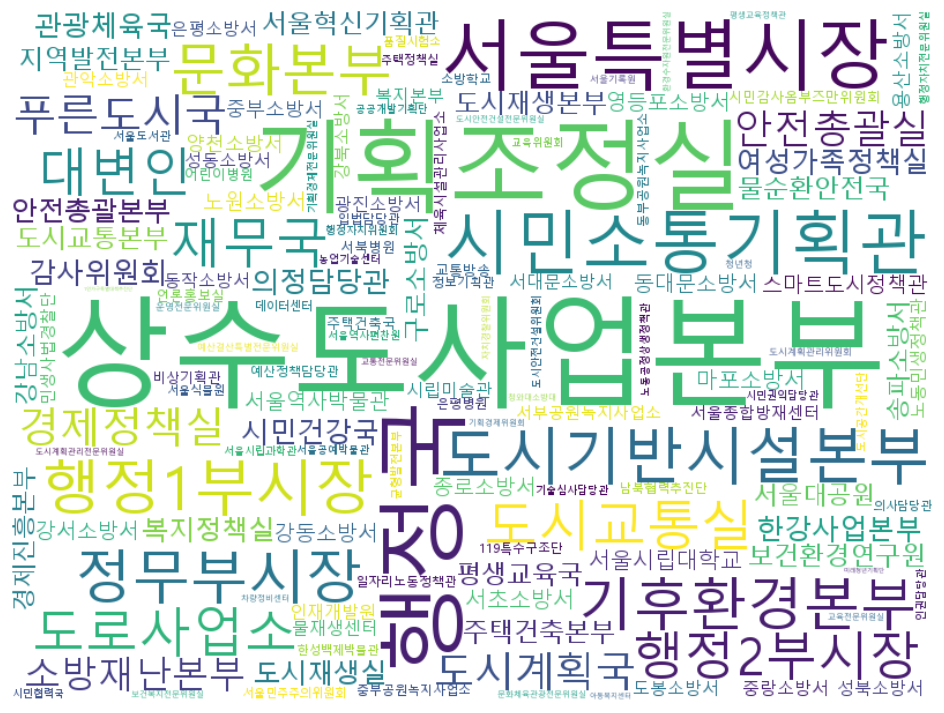

In [151]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

korean_font_path = 'C:/Windows/Fonts/malgun.ttf' # 한글 폰트(맑은 고딕) 파일명

# 워드 클라우드 이미지 생성
wc = WordCloud(font_path=korean_font_path, background_color='white',
              width=800, height=600)

frequencies = dept_level_2_total['집행금액'] # pandas의 Series 형식이 됨
wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(12,9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

In [152]:
df_expense_all['집행일시'].values

array(['2017-01-26 13:10', '2017-01-25 22:41', '2017-01-24 12:35', ...,
       '2021-12-02 12:07', '2021-12-28 16:48', '2021-12-28 10:15'],
      dtype=object)

In [153]:
expense_date_time = pd.to_datetime(df_expense_all['집행일시'])
expense_date_time.values

array(['2017-01-26T13:10:00.000000000', '2017-01-25T22:41:00.000000000',
       '2017-01-24T12:35:00.000000000', ...,
       '2021-12-02T12:07:00.000000000', '2021-12-28T16:48:00.000000000',
       '2021-12-28T10:15:00.000000000'], dtype='datetime64[ns]')

In [154]:
week_day_name = ["월", "화", "수", "목", "금", "토", "일"]

df_expense_all['집행일시_요일'] = [week_day_name[weekday] for weekday in expense_date_time.dt.weekday]

In [155]:
df_expense_all['집행일시_시간'] = [hour for hour in expense_date_time.dt.hour]

In [156]:
df_expense_all.head(3)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_요일,집행일시_시간
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000,목,13
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000,수,22
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000,화,12


In [157]:
expense_weekday = df_expense_all['집행일시_요일'].value_counts()
expense_weekday

목    78250
화    76517
수    73664
금    69356
월    67710
토     3233
일     2508
Name: 집행일시_요일, dtype: int64

In [158]:
expense_weekday = expense_weekday.reindex(index = week_day_name)
expense_weekday

월    67710
화    76517
수    73664
목    78250
금    69356
토     3233
일     2508
Name: 집행일시_요일, dtype: int64

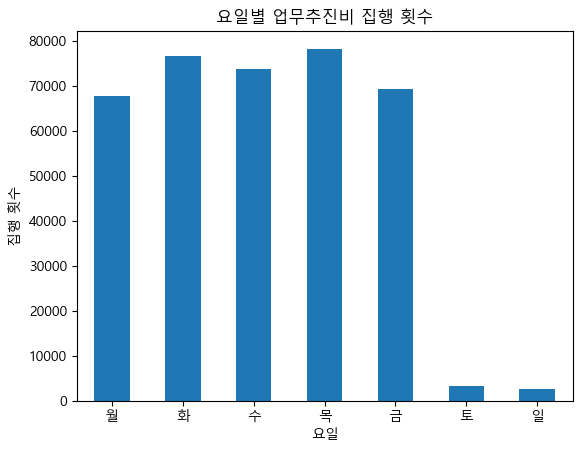

In [159]:
expense_weekday.plot.bar(rot=0)
plt.title("요일별 업무추진비 집행 횟수")
plt.xlabel("요일")
plt.ylabel("집행 횟수")
plt.show()

In [160]:
expense_hour_num = df_expense_all['집행일시_시간'].value_counts()
expense_hour_num

12    159202
13     34857
20     34179
19     24915
11     17846
21     17634
14     15460
15     13188
10     10390
18      9738
16      9177
0       7679
9       6319
17      5088
22      3206
8       1414
7        573
23       166
6         57
1         49
3         29
4         28
5         22
2         22
Name: 집행일시_시간, dtype: int64

In [161]:
work_hour = [ (k+8)%24 for k in range(24)]
expense_hour_num = expense_hour_num.reindex(index = work_hour)
expense_hour_num

8       1414
9       6319
10     10390
11     17846
12    159202
13     34857
14     15460
15     13188
16      9177
17      5088
18      9738
19     24915
20     34179
21     17634
22      3206
23       166
0       7679
1         49
2         22
3         29
4         28
5         22
6         57
7        573
Name: 집행일시_시간, dtype: int64

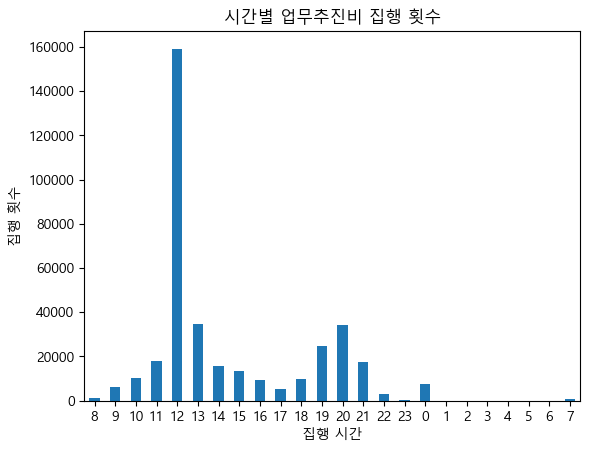

In [162]:
expense_hour_num.plot.bar(rot = 0)
plt.title("시간별 업무추진비 집행 횟수")
plt.xlabel("집행 시간")
plt.ylabel("집행 횟수")
plt.show()

In [164]:
expense_hour_total = pd.pivot_table(df_expense_all, index = ['집행일시_시간'],
                                    values=['집행금액'], aggfunc = sum)
expense_hour_total

,집행금액
집행일시_시간,
0,1388127582
1,7751161
2,3632360
3,7671262
4,6209031
5,4564778
6,5093752
7,43329784
8,163367300


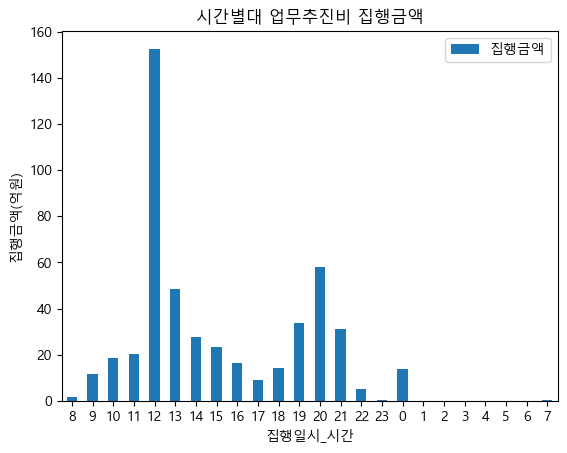

In [165]:
eok_won = 100000000 # 억원
expense_hour_total = expense_hour_total.reindex(index = work_hour)

(expense_hour_total/eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title("시간별대 업무추진비 집행금액")
plt.show()